In [1]:
##Created By Unfriendly 
#(A simple Jupyter Notebook in Binder for Crypto price prediction)

historical_start = "6yr,0mon,0day,0hr,0min,0sec"
# How long to historically look back at data

predict_into = "0yr,0mon,10day,0hr,0min,0sec" 
# How far to try and predict into the future

In [2]:
import os, glob
for dirname, _, filenames in os.walk('/unfriendly/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Prepare data timestamps
import time
from datetime import datetime, timezone, timedelta
one_yr = 31536000000
one_mon = one_yr/12
one_day = one_yr/365
one_hr = one_day/24
one_min = one_hr/60
one_sec = one_min/60

In [6]:
# Prepare how far to look back in the past in UNIX time-format
history_split = historical_start.replace('yr', '')
history_res = history_split.replace('mon', '')
history_split = history_res.replace('day', '')
history_res = history_split.replace('hr', '')
history_split = history_res.replace('min', '')
history_res = history_split.replace('sec', '')
history_split = history_res.split(",")
print(history_split)

['6', '0', '0', '0', '0', '0']


In [7]:
# Prepare how far to predict into the future in UNIX time-format
predict_split = predict_into.replace('yr', '')
predict_res = predict_split.replace('mon', '')
predict_split = predict_res.replace('day', '')
predict_res = predict_split.replace('hr', '')
predict_split = predict_res.replace('min', '')
predict_res = predict_split.replace('sec', '')
predict_split = predict_res.split(",")
print(predict_split)

['0', '0', '10', '0', '0', '0']


In [8]:
history_array_yr = int(history_split[0])
unix_hist_yr = one_yr*history_array_yr

history_array_mon = int(history_split[1])
unix_hist_mon = one_mon*history_array_mon

history_array_day = int(history_split[2])
unix_hist_day = one_day*history_array_day

history_array_hr = int(history_split[3])
unix_hist_hr = one_hr*history_array_hr

history_array_min = int(history_split[4])
unix_hist_min = one_min*history_array_min

history_array_sec = int(history_split[5])
unix_hist_sec = one_sec*history_array_sec

In [9]:
predict_array_yr = int(predict_split[0])
unix_pred_yr = one_yr*predict_array_yr

predict_array_mon = int(predict_split[1])
unix_pred_mon = one_mon*predict_array_mon

predict_array_day = int(predict_split[2])
unix_pred_day = one_day*predict_array_day

predict_array_hr = int(predict_split[3])
unix_pred_hr = one_hr*predict_array_hr

predict_array_min = int(predict_split[4])
unix_pred_min = one_min*predict_array_min

predict_array_sec = int(predict_split[5])
unix_pred_sec = one_sec*predict_array_sec

unix_prediction = unix_pred_yr+unix_pred_mon+unix_pred_day+unix_pred_hr+unix_pred_min+unix_pred_sec

In [10]:
raw_time = time.time()
int_time = int(raw_time)
current_time = str(int_time)

unix_start = unix_hist_yr+unix_hist_mon+unix_hist_day+unix_hist_hr+unix_hist_min+unix_hist_sec
raw_start = raw_time - unix_start

int_start = int(raw_start)
start = str(int_start)

#print(unix_hist_yr+history_array_mon+history_array_day+history_array_hr+history_array_min+history_array_sec)
print(start + ' - start')

gather_count = int_start/(7*one_day)
gather_int = int(gather_count)
gather_str = str(gather_int)
pos_gather_count = abs(int(gather_count))
pos_gather_str = str(pos_gather_count)

print(gather_str + ' - gather')
print(pos_gather_str + ' - positive gather')

-187602627458 - start
-310 - gather
310 - positive gather


In [11]:
print((datetime.now(timezone.utc) + timedelta(hours=0)).timestamp() * 1e3)

dt = (datetime.now(timezone.utc) + timedelta(days=0)).timestamp() * 1e3

c_dt = int(dt)

c_dt_int = int(c_dt)
print(str(c_dt_int))

c_dt_array_year = history_array_yr*365

history_array_comb = history_array_day + c_dt_array_year

c_dt_start = (datetime.now(timezone.utc) + timedelta(days=-history_array_comb,hours=-history_array_hr,minutes=-history_array_min,seconds=-history_array_sec)).timestamp() * 1e3

c_dt_start_int = int(c_dt_start)
print(str(c_dt_start_int))

c_dt_start_raw = (datetime.now(timezone.utc) + timedelta(days=-history_array_comb,hours=-history_array_hr,minutes=-history_array_min,seconds=-history_array_sec)).timestamp()
c_dt_start_raw_int = int(c_dt_start_raw)
print(str(c_dt_start_raw))       
    
data_count = 0

c_dt_start_dt = datetime.utcfromtimestamp(c_dt_start_raw).strftime('%Y-%m-%d %H:%M:%S.%f+00:00')

print(datetime.now(timezone.utc))
print(datetime.utcfromtimestamp(c_dt_start_raw).strftime('%Y-%m-%d %H:%M:%S.%f+00:00'))

#c_dt_end = c_dt_start + timedelta(days=7).timestamp() * 1e3
#c_dt_end = (c_dt_start_dt + timedelta(days=7)).timestamp() * 1e3

c_dt_end = (datetime.utcfromtimestamp(c_dt_start_raw) + timedelta(days=7)).timestamp() * 1e3

c_dt_start_int = int(c_dt_start)
c_dt_end_int = int(c_dt_end)
c_dt_end_str = str(c_dt_end)


c_dt_str = str(c_dt)
c_dt_start_str = str(c_dt_start_int)


ts_ten_int = int(c_dt/1000)
start_ten_int = int(c_dt_start_int/1000)

ts_ten_str = str(ts_ten_int)
start_ten_str = str(start_ten_int)


print(c_dt_start_int)
print(c_dt_end_int)
print(c_dt_int)
print('13 Digit Microsecond TS: ' + c_dt_start_str + ' - ' + '10 Digit TS: ' + start_ten_str)

1613372541429.333
1613372541429
1424156541429
1424156541.429333
2021-02-15 07:02:21.429833+00:00
2015-02-17 07:02:21.429333+00:00
1424156541429
1424779341429
1613372541429
13 Digit Microsecond TS: 1424156541429 - 10 Digit TS: 1424156541


In [12]:
import urllib.request

#while count < pos_gather_count:
while data_count < 1:
    
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1411862400&period2=" + current_time + "&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1411862400&period2=1612158064&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+dt_str+"&period2="+dt_end_str+"&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+gather_str+"&period2="+current_time+"&interval=1m&events=history&includeAdjustedClose=true"
    
    
    d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+start_ten_str+"&period2="+ts_ten_str+"&interval=1d&events=history&includeAdjustedClose=true"
    
    print(d_u)
    
    with urllib.request.urlopen(d_u) as testfile, open('dataset.csv', 'w') as f:
        f.write(testfile.read().decode())

    data_count += 1  # This is the same as count = count + 1

https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1424156541&period2=1613372541&interval=1d&events=history&includeAdjustedClose=true


In [13]:
data=pd.read_csv('dataset.csv')

data.apply(pd.to_numeric, errors='coerce')

#data=data.dropna()
#data=data.dropna(inplace=True)
#data=data.dropna(subset=['Close'])
#data=data.dropna(how='any',axis=1)

data.dropna(subset=['Close'], inplace=True)
data.reset_index(drop=True)

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-17,233.421997,245.774994,232.313995,243.610001,243.610001,2.736310e+07
1,2015-02-18,243.779999,244.251007,232.339996,236.326004,236.326004,2.520080e+07
2,2015-02-19,236.410004,242.671997,235.591995,240.283005,240.283005,1.827050e+07
3,2015-02-20,240.251007,247.100998,239.298996,243.779007,243.779007,2.387670e+07
4,2015-02-21,243.751999,255.320007,243.184006,244.533997,244.533997,1.228420e+07
...,...,...,...,...,...,...,...
2186,2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,47909.332031,8.138891e+10
2187,2021-02-12,47877.035156,48745.734375,46424.976563,47504.851563,47504.851563,7.655504e+10
2188,2021-02-13,47491.203125,48047.746094,46392.281250,47105.515625,47105.515625,7.025046e+10
2189,2021-02-14,47114.507813,49487.640625,47114.507813,48717.289063,48717.289063,7.124868e+10


In [14]:
df1=data['Close']
df1

0         243.610001
1         236.326004
2         240.283005
3         243.779007
4         244.533997
            ...     
2186    47909.332031
2187    47504.851563
2188    47105.515625
2189    48717.289063
2190    47018.882813
Name: Close, Length: 2187, dtype: float64

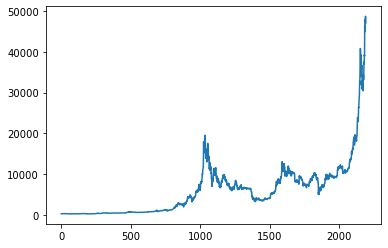

In [15]:
plt.plot(df1)

In [16]:
import numpy as np

In [17]:
df1

0         243.610001
1         236.326004
2         240.283005
3         243.779007
4         244.533997
            ...     
2186    47909.332031
2187    47504.851563
2188    47105.515625
2189    48717.289063
2190    47018.882813
Name: Close, Length: 2187, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(1421, 766)

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(1320, 100)
(1320,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(665, 100)
(665,)


(None, None)

In [25]:
X_train.shape[1]

100

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.optimizers import Adam

In [28]:
#opt = Adam(lr=0.0001)
opt = Adam(lr=0.0025)

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
#model.compile(loss='mean_squared_error',optimizer='adam')
model.compile(optimizer=opt, loss='mean_squared_error')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=128,verbose=1)

Epoch 1/100
11/11 [==============================] - 6s 173ms/step - loss: 0.0057 - val_loss: 0.0082
Epoch 2/100
11/11 [==============================] - 0s 29ms/step - loss: 9.8832e-04 - val_loss: 0.0017
Epoch 3/100
11/11 [==============================] - 0s 28ms/step - loss: 4.6369e-04 - val_loss: 0.0044
Epoch 4/100
11/11 [==============================] - 0s 30ms/step - loss: 2.7162e-04 - val_loss: 0.0036
Epoch 5/100
11/11 [==============================] - 0s 28ms/step - loss: 2.2328e-04 - val_loss: 0.0022
Epoch 6/100
11/11 [==============================] - 0s 26ms/step - loss: 2.5663e-04 - val_loss: 0.0030
Epoch 7/100
11/11 [==============================] - 0s 31ms/step - loss: 2.1172e-04 - val_loss: 0.0040
Epoch 8/100
11/11 [==============================] - 0s 28ms/step - loss: 2.5344e-04 - val_loss: 0.0040
Epoch 9/100
11/11 [==============================] - 0s 29ms/step - loss: 2.1952e-04 - val_loss: 0.0057
Epoch 10/100
11/11 [==============================] - 0s 31ms/step 

11/11 [==============================] - 0s 30ms/step - loss: 6.7669e-05 - val_loss: 7.2446e-04
Epoch 79/100
11/11 [==============================] - 0s 28ms/step - loss: 4.8898e-05 - val_loss: 8.4814e-04
Epoch 80/100
11/11 [==============================] - 0s 26ms/step - loss: 6.1840e-05 - val_loss: 8.0830e-04
Epoch 81/100
11/11 [==============================] - 0s 27ms/step - loss: 6.5222e-05 - val_loss: 6.3184e-04
Epoch 82/100
11/11 [==============================] - 0s 27ms/step - loss: 6.3913e-05 - val_loss: 7.7867e-04
Epoch 83/100
11/11 [==============================] - 0s 29ms/step - loss: 7.7003e-05 - val_loss: 4.6062e-04
Epoch 84/100
11/11 [==============================] - 0s 28ms/step - loss: 6.8701e-05 - val_loss: 5.3924e-04
Epoch 85/100
11/11 [==============================] - 0s 28ms/step - loss: 5.4095e-05 - val_loss: 5.8612e-04
Epoch 86/100
11/11 [==============================] - 0s 27ms/step - loss: 4.2260e-05 - val_loss: 7.0906e-04
Epoch 87/100
11/11 [============

In [31]:
import tensorflow as tf
### Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5069.5826101595685

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

13238.325152043248

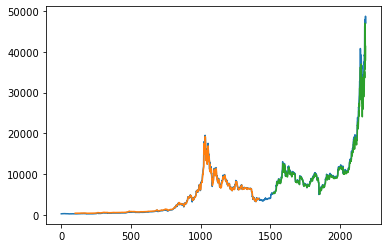

In [34]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)
tdl_int = len(test_data)
tdl_length = tdl_int - 100
print(tdl_int)
print(tdl_length)

766
666


In [36]:
x_input=test_data[tdl_length:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input

[0.3147821389019199,
 0.31174644141192354,
 0.31089268294786293,
 0.31935412650203027,
 0.3312082165743183,
 0.33206304206416354,
 0.32691592964832344,
 0.32459562002649567,
 0.34027431930177343,
 0.35943235561102227,
 0.3627019926185241,
 0.3629717277195834,
 0.379551355882034,
 0.3799825938024514,
 0.37437038062220346,
 0.37424914278092797,
 0.38957367131929993,
 0.38183570889131885,
 0.3492320689809395,
 0.3483616609523072,
 0.36091684483327546,
 0.37040150200016725,
 0.40026023809741595,
 0.3832968846783775,
 0.3915038535710635,
 0.3965403983622429,
 0.3811686792592504,
 0.39053777595450717,
 0.39447311385237765,
 0.3913088100069241,
 0.373363152192893,
 0.3781618920286711,
 0.37220553408848306,
 0.36795689438842183,
 0.38331045397341434,
 0.39029352860261274,
 0.3924429536471506,
 0.3959565159073379,
 0.43499272764595615,
 0.46580417337672986,
 0.4726650438051787,
 0.48775305584683243,
 0.47966064082452203,
 0.465761291177649,
 0.4859635594336431,
 0.47479638987713446,
 0.48499297

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7621823]
101
1 day input [0.31174644 0.31089268 0.31935413 0.33120822 0.33206304 0.32691593
 0.32459562 0.34027432 0.35943236 0.36270199 0.36297173 0.37955136
 0.37998259 0.37437038 0.37424914 0.38957367 0.38183571 0.34923207
 0.34836166 0.36091684 0.3704015  0.40026024 0.38329688 0.39150385
 0.3965404  0.38116868 0.39053778 0.39447311 0.39130881 0.37336315
 0.37816189 0.37220553 0.36795689 0.38331045 0.39029353 0.39244295
 0.39595652 0.43499273 0.46580417 0.47266504 0.48775306 0.47966064
 0.46576129 0.48596356 0.47479639 0.48499297 0.50414167 0.54067771
 0.53728144 0.55403195 0.55975545 0.59023604 0.59355037 0.6012283
 0.65798561 0.67148384 0.6547829  0.69643718 0.75481938 0.80732089
 0.83673051 0.82553491 0.7864042  0.72889091 0.69500503 0.76496221
 0.80353348 0.75484008 0.74149707 0.73352162 0.75081398 0.73926365
 0.72850114 0.63115291 0.67609636 0.6567564  0.66132765 0.66291533
 0.66710974 0.62304781 0.64813829 0.70311577 0.70214965 0.67833517
 0.68705181 0.72772886 0.7681727  0

13 day output [[0.27717584]]
14 day input [0.37437038 0.37424914 0.38957367 0.38183571 0.34923207 0.34836166
 0.36091684 0.3704015  0.40026024 0.38329688 0.39150385 0.3965404
 0.38116868 0.39053778 0.39447311 0.39130881 0.37336315 0.37816189
 0.37220553 0.36795689 0.38331045 0.39029353 0.39244295 0.39595652
 0.43499273 0.46580417 0.47266504 0.48775306 0.47966064 0.46576129
 0.48596356 0.47479639 0.48499297 0.50414167 0.54067771 0.53728144
 0.55403195 0.55975545 0.59023604 0.59355037 0.6012283  0.65798561
 0.67148384 0.6547829  0.69643718 0.75481938 0.80732089 0.83673051
 0.82553491 0.7864042  0.72889091 0.69500503 0.76496221 0.80353348
 0.75484008 0.74149707 0.73352162 0.75081398 0.73926365 0.72850114
 0.63115291 0.67609636 0.6567564  0.66132765 0.66291533 0.66710974
 0.62304781 0.64813829 0.70311577 0.70214965 0.67833517 0.68705181
 0.72772886 0.7681727  0.75691606 0.78203094 0.8051556  0.79768097
 0.94803152 0.95389958 0.9216789  0.98334343 0.97500479 0.96677221
 1.         0.9649862

26 day output [[0.13723117]]
27 day input [0.39053778 0.39447311 0.39130881 0.37336315 0.37816189 0.37220553
 0.36795689 0.38331045 0.39029353 0.39244295 0.39595652 0.43499273
 0.46580417 0.47266504 0.48775306 0.47966064 0.46576129 0.48596356
 0.47479639 0.48499297 0.50414167 0.54067771 0.53728144 0.55403195
 0.55975545 0.59023604 0.59355037 0.6012283  0.65798561 0.67148384
 0.6547829  0.69643718 0.75481938 0.80732089 0.83673051 0.82553491
 0.7864042  0.72889091 0.69500503 0.76496221 0.80353348 0.75484008
 0.74149707 0.73352162 0.75081398 0.73926365 0.72850114 0.63115291
 0.67609636 0.6567564  0.66132765 0.66291533 0.66710974 0.62304781
 0.64813829 0.70311577 0.70214965 0.67833517 0.68705181 0.72772886
 0.7681727  0.75691606 0.78203094 0.8051556  0.79768097 0.94803152
 0.95389958 0.9216789  0.98334343 0.97500479 0.96677221 1.
 0.96498622 0.7621823  0.48999527 0.32989347 0.32145354 0.37734416
 0.42825684 0.45043015 0.44264653 0.41386044 0.37667719 0.34166685
 0.31358483 0.29282752 0.277

In [46]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [47]:
import matplotlib.pyplot as plt

In [48]:
len(df1)

2187

In [50]:
plt.plot(day_new,scaler.inverse_transform(df1[2205:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2206:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)